In [ ]:
# !pip install keras-rl2
# !pip install gym==0.23.1
# !pip install ale-py -i https://mirrors.aliyun.com/pypi/simple


# 案例6-1：在Keras-rl下使用SARSA算法处理CartPole问题


In [2]:
import numpy as np
import gym

# 1.初始化环境
ENV_NAME = 'CartPole-v1'
env = gym.make(ENV_NAME)
np.random.seed(123)
env.reset(seed=123)
nb_actions = env.action_space.n
# 打印状态空间形状以确认
print("Observation space shape:", env.observation_space.shape)

ModuleNotFoundError: No module named 'gym'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# 2.构造深度神经网络
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(24,activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(nb_actions, activation='linear'))
model.summary()

d:\Anaconda\lib\site-packages\h5py\__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 24)                120       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from rl.agents import SARSAAgent
from rl.policy import EpsGreedyQPolicy

# 3.创建SARSAAgent
policy = EpsGreedyQPolicy()
sarsa = SARSAAgent(model=model, nb_actions=nb_actions, nb_steps_warmup=10, policy=policy)
sarsa.compile(Adam(learning_rate=1e-2), metrics=['mse'])

sarsa.fit(env, nb_steps=2000, visualize=True, verbose=2)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
sarsa.test(env, nb_episodes=5, visualize=True)

# 案例6-2：在Keras-rl下使用DQN算法处理CartPole问题

pip install --upgrade pygame==2.6.1 -i https://mirrors.aliyun.com/pypi/simple

In [1]:
import numpy as np
import gym
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 设置为2以屏蔽警告信息

ENV_NAME = 'CartPole-v1'
env = gym.make(ENV_NAME)
env.reset(seed=np.random.seed(0))
nb_actions = env.action_space.n

model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(24,activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(nb_actions, activation='linear'))
model.summary()

# 创建记忆体，记忆体的大小为2000，创建∈贪婪算法EpsGreedyQPolicy对象：
memory = SequentialMemory(limit=2000, window_length=1)
policy = EpsGreedyQPolicy()
# 创建DQNAgent，使用之前构造的MLP
dqn = DQNAgent(model=model,
        nb_actions=nb_actions,
        memory=memory,
        nb_steps_warmup=10,
        target_model_update=1e-2,
        policy=policy)
# 编译MLP，优化器使用Adam，评估器使用mae
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])
# 测试阶段使用∈贪婪算法，测试阶段使用默认的贪婪算法：
dqn.fit(env, nb_steps=2000, visualize=False, verbose=2)

d:\Anaconda\lib\site-packages\h5py\__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 24)                120       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/is

d:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
d:\Anaconda\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
d:\Anaconda\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
d:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates

   44/2000: episode: 2, duration: 0.595s, episode steps:  34, steps per second:  57, episode reward: 34.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.706 [0.000, 1.000],  loss: 0.387528, mae: 0.484787, mean_q: 0.265527
   53/2000: episode: 3, duration: 0.048s, episode steps:   9, steps per second: 188, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.246640, mae: 0.462701, mean_q: 0.553840
   61/2000: episode: 4, duration: 0.044s, episode steps:   8, steps per second: 183, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.201751, mae: 0.454089, mean_q: 0.682006
   71/2000: episode: 5, duration: 0.051s, episode steps:  10, steps per second: 197, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.166215, mae: 0.448669, mean_q: 0.822484
   81/2000: episode: 6, duration: 0.059s, episode steps:  10, steps per seco

In [2]:
dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Episode 1: reward: 161.000, steps: 161
Episode 2: reward: 102.000, steps: 102
Episode 3: reward: 132.000, steps: 132
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 87.000, steps: 87


# 案例6-3：在Keras-rl下使用DQN算法玩Atari游戏

以最经典的Pong游戏为例介绍如何使用Keras-rl在OpenAI Gym下玩Atari游戏

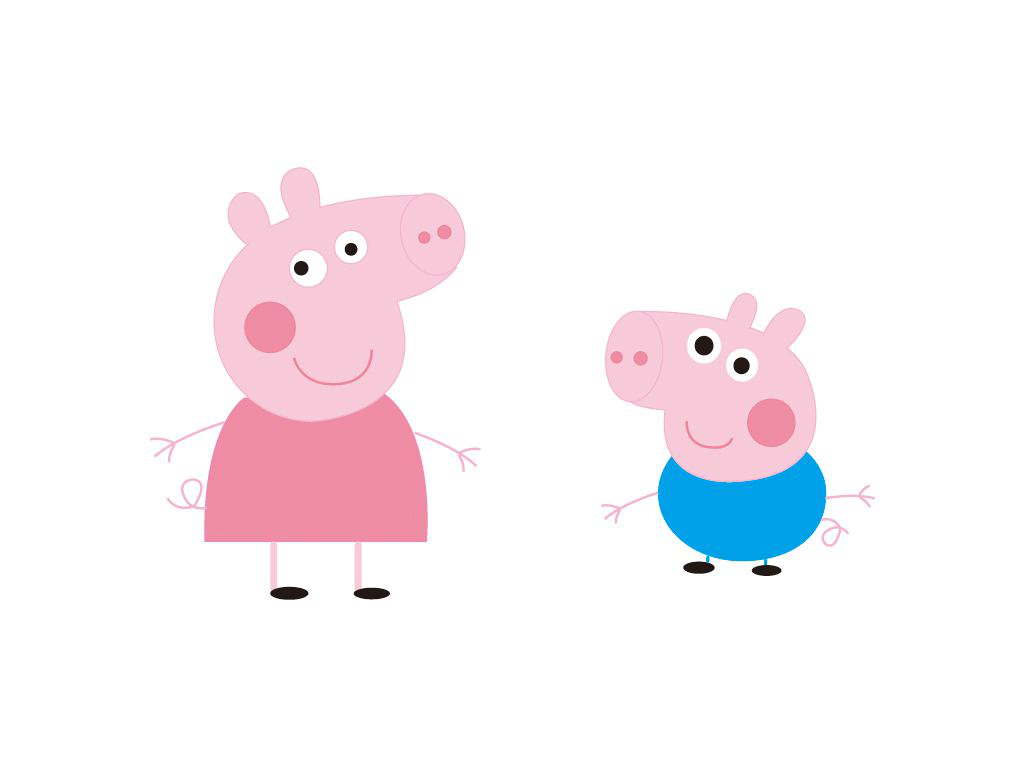

In [8]:
# 3.图像处理
from PIL import Image
file_name="pig.jpeg"
pig=Image.open(file_name)
pig

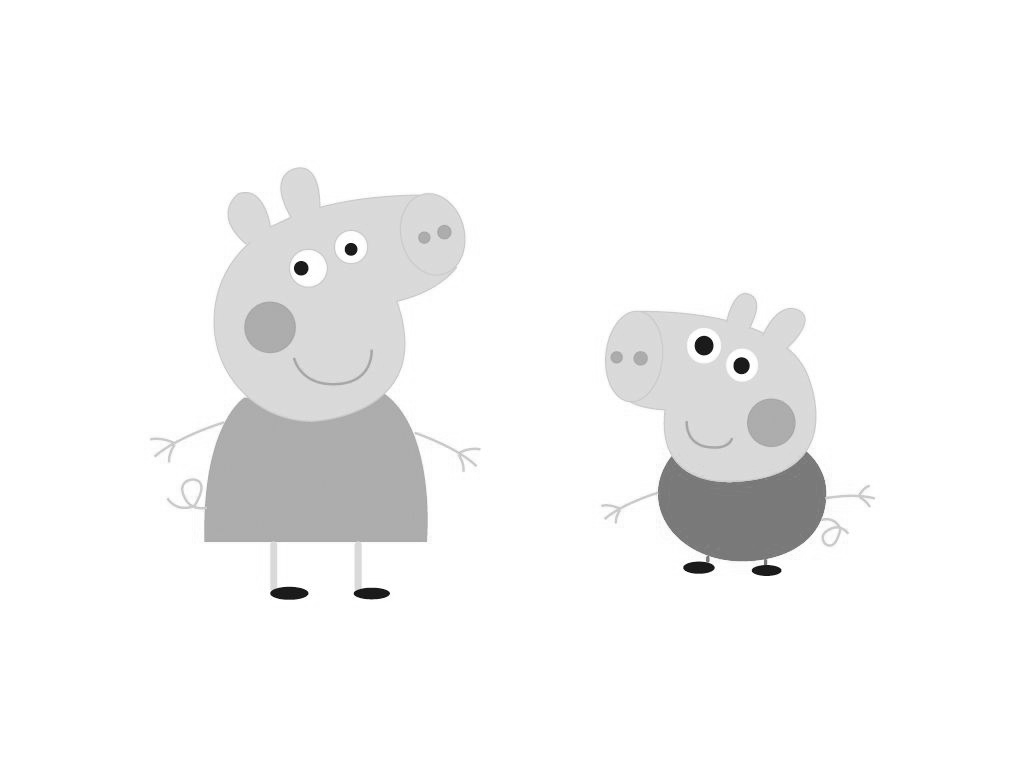

In [12]:
pig_L=pig.convert("L")
pig_L

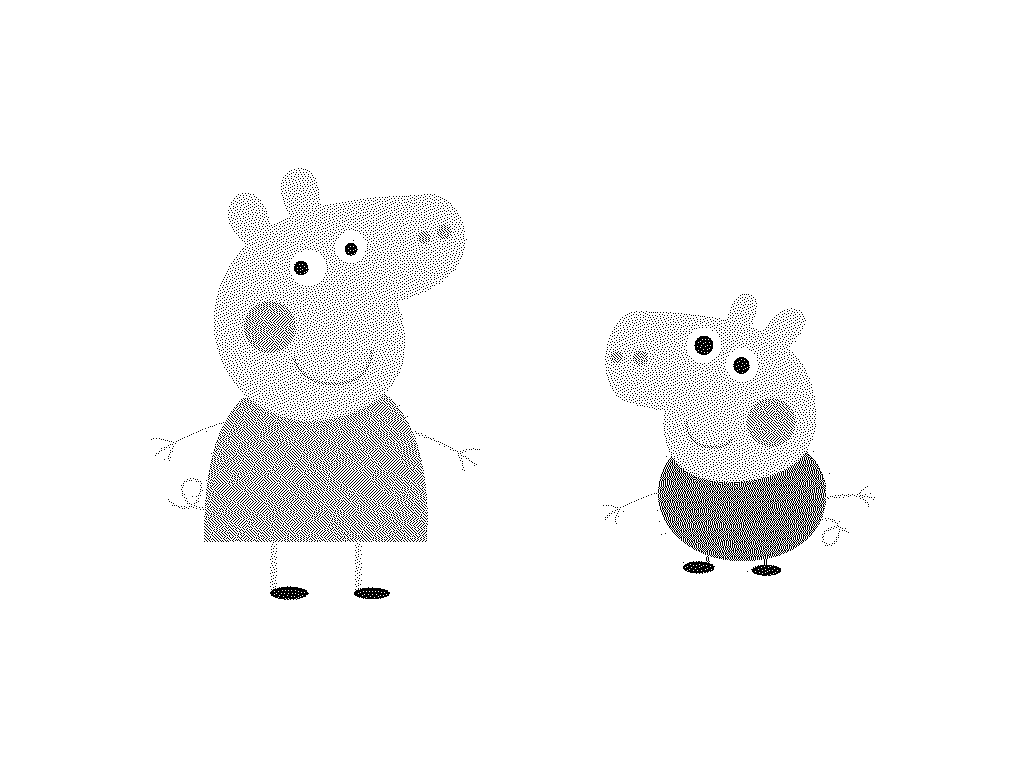

In [13]:
pig_1=pig.convert("1")
pig_1

In [1]:
from __future__ import division
import argparse

from PIL import Image
import numpy as np
import gym
import os

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from keras.optimizers import Adam
import keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

from keras.utils.vis_utils import plot_model

from keras.callbacks import TensorBoard

INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4


class AtariProcessor(Processor):
    def process_observation(self, observation):
        # 在Pong-v0环境中，图片的颜色不影响决策下一步的动作，所以可以把图像转换成灰度图像，并最终把图像转换成一个字节数组
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')  # resize and convert to grayscale
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')  # saves storage in experience memory

    def process_state_batch(self, batch):
        # We could perform this processing step in `process_observation`. In this case, however,
        # we would need to store a `float32` array instead, which is 4x more memory intensive than
        # an `uint8` array. This matters if we store 1M observations.
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

# parser = argparse.ArgumentParser()
# parser.add_argument('--mode', choices=['train', 'test','show'], default='show')
# parser.add_argument('--env-name', type=str, default='Pong-v0')
# parser.add_argument('--weights', type=str, default=None)
# args = parser.parse_args()

class parser:
    mode='show'
    env_name='Pong-v0'
    weights=None
args = parser()

# 2.初始化环境
env = gym.make(args.env_name)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

"nb_actions:{}".format(nb_actions)

ModuleNotFoundError: No module named 'PIL'

## 4.构造深度神经网络

In [ ]:
# Next, we build our model. We use the same model that was described by Mnih et al. (2015).
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
model = Sequential()
if K.image_dim_ordering() == 'tf':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_dim_ordering() == 'th':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')
model.add(Convolution2D(32, 8, 8, subsample=(4, 4)))
model.add(Activation('relu'))
model.add(Convolution2D(64, 4, 4, subsample=(2, 2)))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3, subsample=(1, 1)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

## 5.创建DQNAgent

In [ ]:

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

# Select a policy. We use eps-greedy action selection, which means that a random action is selected
# with probability eps. We anneal eps from 1.0 to 0.1 over the course of 1M steps. This is done so that
# the agent initially explores the environment (high eps) and then gradually sticks to what it knows
# (low eps). We also set a dedicated eps value that is used during testing. Note that we set it to 0.05
# so that the agent still performs some random actions. This ensures that the agent cannot get stuck.
#policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.05,
#                              nb_steps=1000000)
policy = EpsGreedyQPolicy()

# The trade-off between exploration and exploitation is difficult and an on-going research topic.
# If you want, you can experiment with the parameters or use a different policy. Another popular one
# is Boltzmann-style exploration:
# policy = BoltzmannQPolicy(tau=1.)
# Feel free to give it a try!

dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy, memory=memory,
               processor=processor, nb_steps_warmup=50000, gamma=.99, target_model_update=10000,
               train_interval=4, delta_clip=1.)
dqn.compile(Adam(lr=.00025), metrics=['mae'])

plot_model(model, to_file="{}.png".format(os.path.basename(__file__)),show_shapes=True)

if args.mode == 'train':
    # Okay, now it's time to learn something! We capture the interrupt exception so that training
    # can be prematurely aborted. Notice that you can the built-in Keras callbacks!
    weights_filename = 'dqn_{}_weights.h5f'.format(args.env_name)
    checkpoint_weights_filename = 'dqn_' + args.env_name + '_weights_{step}.h5f'
    log_filename = 'dqn_{}_log.json'.format(args.env_name)
    callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000)]
    callbacks += [FileLogger(log_filename, interval=100)]
    #callbacks += [TensorBoard(log_dir = "/tmp/log")]
    dqn.fit(env, callbacks=callbacks, nb_steps=100000, log_interval=10000)

    # After training is done, we save the final weights one more time.
    dqn.save_weights(weights_filename, overwrite=True)

    # Finally, evaluate our algorithm for 10 episodes.
    dqn.test(env, nb_episodes=10, visualize=True)
elif args.mode == 'test':
    weights_filename = 'dqn_{}_weights.h5f'.format(args.env_name)
    if args.weights:
        weights_filename = args.weights
    dqn.load_weights(weights_filename)
    dqn.test(env, nb_episodes=10, visualize=True)
else:
    weights_filename = 'dqn_Pong-100000-v0_weights.h5f'
    if args.weights:
        weights_filename = args.weights
    dqn.load_weights(weights_filename)
    dqn.test(env, nb_episodes=10, visualize=True)